In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# 1.

## a)

$M = \begin{bmatrix}0 & 0 & 1 & 0\\1 & 0 & 0 & 0\\ 1 & 1 & 0 & 1\\ 0 & 0 & 0 & 0\end{bmatrix}$

$A = \begin{bmatrix}0 & 0 & 1 & 0\\1/2 & 0 & 0 & 0\\ 1/2 & 1 & 0 & 1\\ 0 & 0 & 0 & 0\end{bmatrix}$

## b)

In [2]:
A = np.array([[0,0,1,0], [.5, 0, 0, 0], [.5, 1, 0, 1], [0, 0, 0, 0]])
pi = np.array([0.25, 0.25, 0.25, 0.25])

converged = False
while not converged:
    newpi = A@pi
    
    if np.allclose(newpi, pi, rtol=1e-10):
        converged = True
        
    pi = newpi
    
print("Page Rank: ", pi)

Page Rank:  [0.4 0.2 0.4 0. ]


## c)

In [3]:
G = 0.8 * A + ((1 - 0.8) * .25 * np.ones((4,1))@np.ones((4,1)).T)

print(G)

[[0.05 0.05 0.85 0.05]
 [0.45 0.05 0.05 0.05]
 [0.45 0.85 0.05 0.85]
 [0.05 0.05 0.05 0.05]]


In [4]:
converged = False
pi = np.array([0.25, 0.25, 0.25, 0.25])
while not converged:
    newpi = G@pi
    
    if np.allclose(newpi, pi, rtol=1e-10):
        converged = True
        
    pi = newpi

print("Page Rank: ", pi)

Page Rank:  [0.36320755 0.19528302 0.39150943 0.05      ]


## d)

In this case we'd have the first row with all 1s and all other rows with all 0s ie:

$M = \begin{bmatrix}1 & 1 & 1 & ...\\0 & 0 & 0 & ...\\ 0 & 0 & 0 & ...\\ ... & ... & ... & ...\end{bmatrix}$

And for $G$:

$G =  \alpha * \begin{bmatrix}1 & 1 & 1 & ...\\ 0 & 0 & 0 & ...\\ 0 & 0 & 0 & ...\\ ... & ... & ... & ...\end{bmatrix} + (1 - \alpha)\frac{1}{n}\mathbb{1}\mathbb{1}^T$

$G =  \begin{bmatrix}\alpha & \alpha & \alpha & ...\\ 0 & 0 & 0 & ...\\ 0 & 0 & 0 & ...\\ ... & ... & ... & ...\end{bmatrix} +  \begin{bmatrix}\frac{1 - \alpha}{n} & \frac{1 - \alpha}{n}& \frac{1 - \alpha}{n} & ...\\ \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & ...\\ \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & ...\\ ... & ... & ... & ...\end{bmatrix}$

$G =\begin{bmatrix}\alpha + \frac{1 - \alpha}{n} & \alpha + \frac{1 - \alpha}{n} & \alpha + \frac{1 - \alpha}{n} & ...\\ \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & ...\\ \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & ...\\ ... & ... & ... & ...\end{bmatrix}$

$G\pi = \pi$

$\begin{bmatrix}\alpha + \frac{1 - \alpha}{n} & \alpha + \frac{1 - \alpha}{n} & \alpha + \frac{1 - \alpha}{n} & ...\\ \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & ...\\ \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & \frac{1 - \alpha}{n} & ...\\ ... & ... & ... & ...\end{bmatrix}\begin{bmatrix}x \\ y \\ y \\ ...\end{bmatrix} = \begin{bmatrix}x \\ y \\ y \\ ...\end{bmatrix}$

$x = x(\alpha + \frac{1 - \alpha}{n}) + y(n - 1)(\alpha + \frac{1 - \alpha}{n})$

$y = x\frac{1 - \alpha}{n} + y(n -1)\frac{1 - \alpha}{n}$

We also know:

$x + y(n - 1) = 1$

So:

![](d_1.jpg)

and then

![](d_2.jpg)

So we have
$\pi = \begin{bmatrix}\alpha + \frac{1 - \alpha}{n} \\ \frac{1 - \alpha}{n} \\ ... \\ \frac{1 - \alpha}{n}\end{bmatrix}$

# 2.

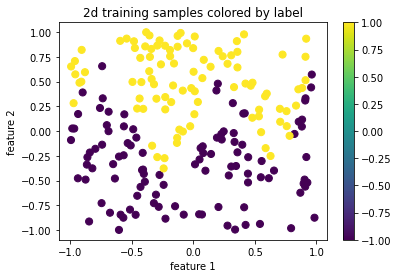

In [5]:
n = 200
p = 2
X = 2 * (np.random.rand(n,p)-.5)
y = np.sign(X[:,1]-(X[:,0]**2/2+np.sin(X[:,0]*7)/2))

plt.figure(1)
plt.scatter(X[:,0], X[:,1], 50, c=y)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('2d training samples colored by label')
plt.show()

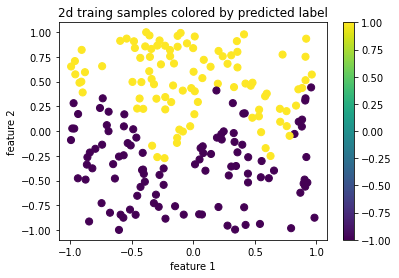

Training Accuracy:  0.97


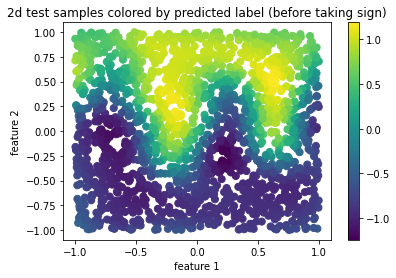

Test Accuracy  0.96


In [7]:
def train_set(sigma, show = False):
    lam = 1
    norms2 = (np.array(la.norm(X, axis=1)).T)**2
    innerProds = X@X.T
    dist2 = np.matrix(norms2).T@np.ones([1, n])\
    + np.ones([n, 1])@np.matrix(norms2) -2*innerProds

    K = np.exp((dist2/(2 * sigma)) * -1)
    alpha = la.inv(K + lam*np.identity(K.shape[0]))@y
    yhat = K@alpha.T
    y2 = np.array(np.sign(yhat)).reshape(1,-1)
    accuracy = (y == y2).sum()/n
    if show:
        plt.figure(2)
        plt.scatter(X[:,0], X[:, 1], 50, c=y2)
        plt.colorbar()
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
        plt.title('2d traing samples colored by predicted label')
        plt.show()
    
    return accuracy, alpha, norms2, innerProds

def test_set(sigma, alpha, norms2, innerProds, show = False):
    lam = 1
    ntest = 2000
    Xtest = 2*(np.random.rand(ntest,p) - .5)
    norms2_test = (np.array(la.norm(Xtest, axis=1)).T)**2
    innerProds_test = Xtest@X.T
    dist2_test = np.matrix(norms2_test).T@np.ones([1, n])\
    + np.ones([ntest, 1])@np.matrix(norms2) - 2*innerProds_test

    K_test = np.exp((dist2_test/(2 * sigma)) * -1)
    ytest = K_test@alpha.T
    ytest_sign = np.sign(ytest).reshape(1,-1)
    ycorrect = np.sign(Xtest[:,1]-(Xtest[:,0]**2/2+np.sin(Xtest[:,0]*7)/2))
    accuracy = (ycorrect == ytest_sign).sum()/2000
    if show:
        plt.figure(3)
        plt.scatter(Xtest[:,0], Xtest[:, 1], 50, c=np.array(ytest))
        plt.colorbar()
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
        plt.title('2d test samples colored by predicted label (before taking sign)')
        plt.show()
        
    return accuracy
        
sigma = .05
lam = 1

train_acc, alpha, norms2, innerprods = train_set(sigma, True)
print("Training Accuracy: ", train_acc)

test_acc =  test_set(sigma, alpha, norms2, innerprods, True)
print("Test Accuracy ", test_acc)


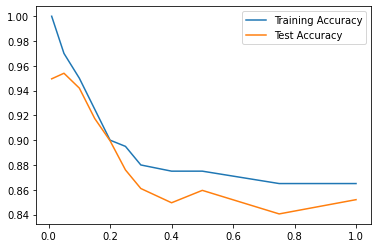

In [8]:
train_accs = []
test_accs = []
sigmas = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1]
for sigma in sigmas:
    train_acc, alpha, norms, innerprods = train_set(sigma)
    test_acc =  test_set(sigma, alpha, norms, innerprods)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
plt.plot(sigmas, train_accs, label="Training Accuracy")
plt.plot(sigmas, test_accs, label="Test Accuracy")
plt.legend()
plt.show()

As sigma increases the accuracy for the training set goes down. The test set seems to increase for a moment, but then also decreases as sigma increases. 